In [5]:
import numpy as np
import heapq

# Define the grid from the user's image
grid = np.array([
    [2, 1, 0],
    [1, 1, 7],
    [6, 8, 2]
])

# Define the heuristic function - Manhattan distance in this case.
#an estimate of the cost from that node to the goal).
def heuristic(current, goal):
    return abs(goal[1] - current[1])

# Cost function - return the value of the cell being moved to
#the actual cost of moving from one node to another
def cost(current, next_node):
    return grid[next_node]

# Define the A* search algorithm
def a_star_search(grid):
    start = (0, 0)
    goal = (grid.shape[0] - 1, grid.shape[1] - 1)
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start))  # (f, g, node)
    came_from = {}
    g_score = {start: 0}
    
    while open_set:
        _, current_g, current = heapq.heappop(open_set)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)  # optional: include start node
            return path[::-1]  # reverse the path
        
        for direction in [(1, 0), (0, 1), (-1, 0), (0, -1)]:  # down, right, up, left
            neighbour = (current[0] + direction[0], current[1] + direction[1])
            
            # Check if the neighbour is within the grid bounds
            if 0 <= neighbour[0] < grid.shape[0] and 0 <= neighbour[1] < grid.shape[1]:
                tentative_g_score = current_g + cost(current, neighbour)
                
                if neighbour not in g_score or tentative_g_score < g_score[neighbour]:
                    g_score[neighbour] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbour, goal)
                    heapq.heappush(open_set, (f_score, tentative_g_score, neighbour))
                    came_from[neighbour] = current
                    
    return "Failure to find a path"  # if there is no path

# Run A* on the grid
# Define the correct grid as provided by the user


# Run A* on the corrected grid
correct_path = a_star_search(grid)
correct_path
# Visualize the path with the corrected grid
# visualize_path_with_numbers(grid, correct_path)


[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]

In [19]:
#Problem 2
import numpy as np

# Define the size of the transformation
n = 4

# Define the transformation matrix P using the provided formula
P = np.zeros((n, n))

# Fill the transformation matrix
for j in range(n):
    for k in range(n):
        if k == 0:
            P[j, k] = 1 / np.sqrt(n)
        else:
            P[j, k] = np.sqrt(2 / n) * np.cos((2 * j + 1) * k * np.pi / (2 * n))

# Given matrix f
f = np.array([
    [1, 0, 1, 0],
    [2, 0, 2, 0],
    [0, 1, 0, 1],
    [-1, 0, -1, 0]
])

# Perform the 2D Discrete Cosine Transform (DCT)
# @ is matrix multiplier operator
# P.T is transposed matrix
F = P.T @ f @ P

# Perform the Inverse 2D Discrete Cosine Transform (IDCT)
f_reconstructed = P @ F @ P.T

# The results of the DCT and the reconstructed matrix
print("DCT" + "\n\n" + str(F) + "\n\n" + "IDCT" + "\n\n" + str(f_reconstructed))


DCT

[[ 1.50000000e+00  1.91341716e-01 -5.55111512e-17  4.61939766e-01]
 [ 1.57716101e+00  8.10660172e-01  3.00424186e-17  1.95710678e+00]
 [-1.50000000e+00 -1.91341716e-01  5.55111512e-17 -4.61939766e-01]
 [-1.12085382e-01 -5.42893219e-01 -1.70176631e-17 -1.31066017e+00]]

IDCT

[[ 1.00000000e+00 -3.62108122e-16  1.00000000e+00 -3.39550659e-16]
 [ 2.00000000e+00 -1.35069406e-16  2.00000000e+00 -2.30438422e-16]
 [-1.54060850e-16  1.00000000e+00 -3.02023285e-16  1.00000000e+00]
 [-1.00000000e+00  2.55543982e-16 -1.00000000e+00  5.51343740e-17]]


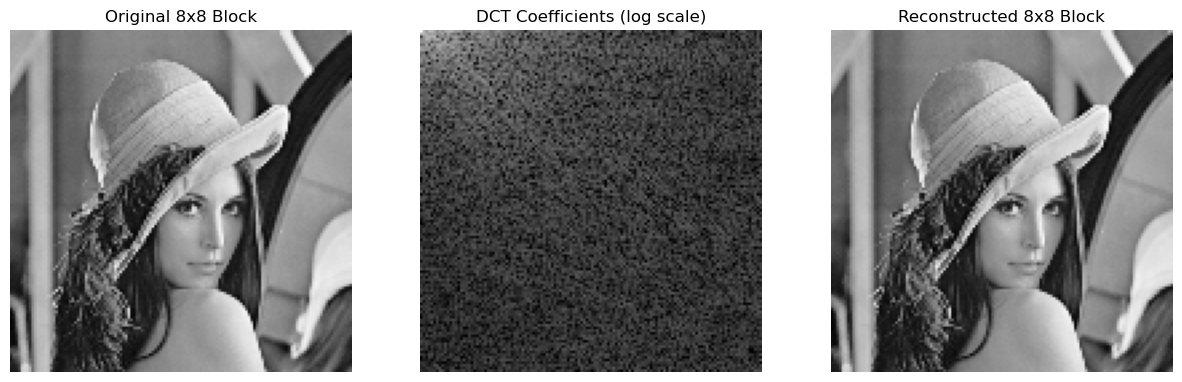

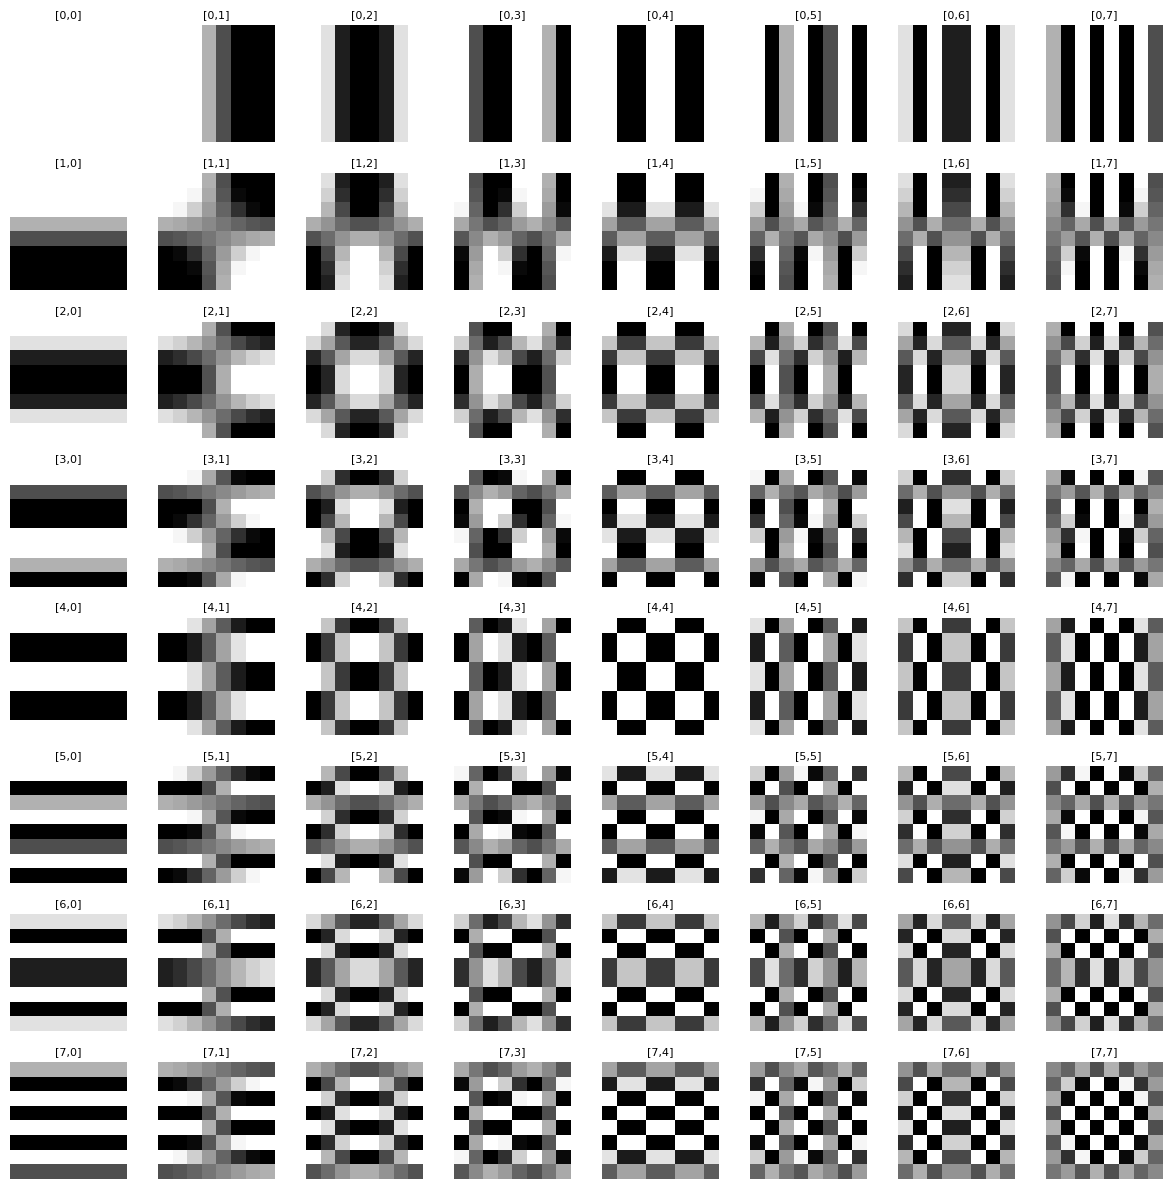

In [27]:
#Problem 3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Function to perform a 2D DCT
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

# Function to perform a 2D inverse DCT (IDCT)
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Read the image in grayscale
lena_image = cv2.imread('lena_color.png', cv2.IMREAD_GRAYSCALE)
lena_image = cv2.resize(lena_image, (128, 128))
# Select an 8x8 block from the Lena image
block = lena_image[0:128, 0:128]

# Apply the 2D DCT to the block
dct_block = dct2(block)

# Apply the inverse 2D DCT to get the reconstructed block
reconstructed_block = idct2(dct_block)

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original block
axs[0].imshow(block, cmap='gray')
axs[0].set_title('Original 8x8 Block')
axs[0].axis('off')

# DCT coefficients
# We use a logarithmic scale to better visualize the coefficients
axs[1].imshow(np.log1p(np.abs(dct_block)), cmap='gray')
axs[1].set_title('DCT Coefficients (log scale)')
axs[1].axis('off')

# Reconstructed block
axs[2].imshow(reconstructed_block, cmap='gray')
axs[2].set_title('Reconstructed 8x8 Block')
axs[2].axis('off')

plt.show()
# Function to create the 8x8 DCT basis functions
def create_dct_basis(n=8):
    basis = np.zeros((n, n, n, n))
    for i in range(n):
        for j in range(n):
            for x in range(n):
                for y in range(n):
                    basis[i, j, x, y] = np.cos((2*x + 1) * i * np.pi / (2 * n)) * \
                                         np.cos((2*y + 1) * j * np.pi / (2 * n))
    return basis

# Function to plot the DCT basis functions
def plot_dct_basis(basis, n=8):
    fig, axs = plt.subplots(n, n, figsize=(12, 12))
    for i in range(n):
        for j in range(n):
            axs[i, j].imshow(basis[i, j], cmap='gray', vmin=-0.5, vmax=0.5)
            axs[i, j].axis('off')
            axs[i, j].set_title(f'[{i},{j}]', fontsize=8)
    plt.tight_layout()
    plt.show()

# Create the DCT basis functions
dct_basis = create_dct_basis()

# Plot the DCT basis functions
plot_dct_basis(dct_basis)


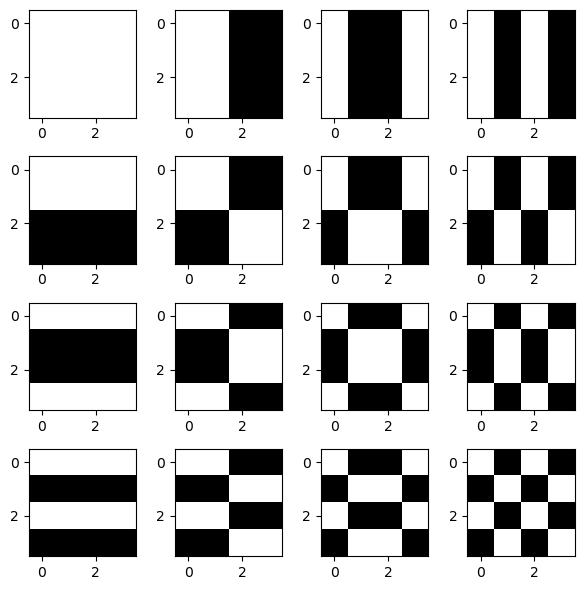

In [32]:
# The provided instructions indicate a need to swap the rows and columns from the initial plot to match the desired order.
# We need to reorder the Walsh-Hadamard matrix according to the sequence provided.

# Define the order for the rows and columns as indicated
row_order = [0, 3, 2, 1]
column_order = [0, 3, 2, 1]

# Create the reordered Hadamard matrix
H_reordered = H[np.ix_(row_order, column_order)]

# Create the figure and axes for the reordered matrix
fig, axes = plt.subplots(4, 4, figsize=(6, 6))

# Generate and plot each pattern for the reordered matrix
for i in range(4):
    for j in range(4):
        # Generate the pattern for the current subplot
        pattern = np.outer(H_reordered[i], H_reordered[j])
        axes[i, j].imshow(pattern, cmap='gray', interpolation='none', vmin=-1, vmax=1)
        axes[i, j].axis('on')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
#Problem 5
import numpy as np

# Given image pixel values
image = np.array([
    [10, 5, 25, 82, 42, 13, 63, 46],
    [88, 64, 35, 39, 66, 21, 15, 44],
    [3, 45, 78, 24, 42, 54, 90, 62],
    [4, 12, 46, 73, 36, 25, 85, 46],
    [35, 66, 3, 56, 42, 73, 85, 25],
    [56, 98, 24, 1, 50, 53, 42, 14],
    [78, 46, 62, 85, 53, 27, 26, 58],
    [34, 52, 26, 52, 25, 47, 24, 34]
])

# Function to calculate the integral image
def integral_image(image):
    # Using the np.cumsum function to get the cumulative sum along both axes
    integral_img = np.cumsum(np.cumsum(image, axis=0), axis=1)
    return integral_img

# Calculate the integral image
int_image = integral_image(image)

# Output the integral image
int_image


array([[  10,   15,   40,  122,  164,  177,  240,  286],
       [  98,  167,  227,  348,  456,  490,  568,  658],
       [ 101,  215,  353,  498,  648,  736,  904, 1056],
       [ 105,  231,  415,  633,  819,  932, 1185, 1383],
       [ 140,  332,  519,  793, 1021, 1207, 1545, 1768],
       [ 196,  486,  697,  972, 1250, 1489, 1869, 2106],
       [ 274,  610,  883, 1243, 1574, 1840, 2246, 2541],
       [ 308,  696,  995, 1407, 1763, 2076, 2506, 2835]])

In [11]:
import numpy as np

# Manually transcribe the original image, codebook, and compressed image indices from the provided image
# Original image matrix
original_image = np.array([
    [220, 210, 205, 226, 232, 230, 225, 225],
    [189, 210, 218, 210, 250, 235, 210, 240],
    [200, 10, 10, 20, 16, 12, 200, 200],
    [205, 11, 29, 32, 7, 8, 200, 200],
    [216, 19, 22, 21, 20, 35, 200, 200],
    [210, 20, 18, 20, 28, 22, 180, 190],
    [200, 200, 219, 219, 190, 195, 200, 220],
    [250, 248, 248, 250, 200, 200, 210, 210]
])

# Codebook matrix
codebook = np.array([
    [200, 205, 222, 210],
    [10, 15, 16, 12],
    [190, 185, 180, 180],
    [210, 25, 22, 28],
    [200, 12, 212, 15],
    [20, 20, 20, 20],
    [210, 210, 240, 220],
    [0, 0, 0, 0]
])

# Compressed image indices matrix
compressed_image_indices = np.array([
    [0, 0, 6, 6],
    [4, 3, 1, 0],
    [4, 5, 5, 2],
    [6, 6, 2, 0]
])

# Reconstruct the compressed image from the indices and the codebook
def reconstruct_image(indices, codebook):
    reconstructed = np.zeros((indices.shape[0]*2, indices.shape[1]*2), dtype=int)
    for i in range(indices.shape[0]):
        for j in range(indices.shape[1]):
            block = codebook[indices[i, j]]
            reconstructed[i*2:i*2+2, j*2:j*2+2] = block.reshape(2, 2)
    return reconstructed

compressed_image = reconstruct_image(compressed_image_indices, codebook)

# Calculate the PSNR between the original and the compressed image
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

initial_psnr = psnr(original_image, compressed_image)
print("Initial PSNR:",initial_psnr)


from sklearn.cluster import KMeans

# The original image and codebook matrices have already been defined in a previous step.
# We will reshape the original image into blocks that match the size of the code vectors.
# Since each code vector is of size 4, we will reshape the original image into blocks of 2x2.

# Define a function to compute PSNR between the original and reconstructed image
def compute_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Define the function to reshape the original image into blocks
def image_to_blocks(image, block_size):
    rows, cols = image.shape
    blocks = np.zeros((rows * cols // (block_size * block_size), block_size * block_size))
    blk_idx = 0
    for row in range(0, rows, block_size):
        for col in range(0, cols, block_size):
            blocks[blk_idx] = image[row:row + block_size, col:col + block_size].flatten()
            blk_idx += 1
    return blocks

# Convert the original image into 2x2 blocks
blocks = image_to_blocks(original_image, 2)

# Flatten the codebook for use with KMeans
flat_codebook = codebook.reshape((-1, 4))

# Perform the LBG algorithm using KMeans clustering
kmeans = KMeans(n_clusters=len(flat_codebook), init=flat_codebook, n_init=1, max_iter=100)
kmeans.fit(blocks)

# Update the codebook with the new centroids
new_codebook = kmeans.cluster_centers_

# Function to reconstruct the image from the blocks
def blocks_to_image(blocks, codebook, compressed_image_indices, block_size, image_shape):
    rows, cols = image_shape
    image = np.zeros(image_shape, dtype=np.uint8)
    blk_idx = 0
    for row in range(0, rows, block_size):
        for col in range(0, cols, block_size):
            block_code = compressed_image_indices[blk_idx // (cols // block_size), blk_idx % (cols // block_size)]
            image[row:row + block_size, col:col + block_size] = codebook[block_code].reshape(block_size, block_size)
            blk_idx += 1
    return image

# Reconstruct the image from the compressed indices using the new codebook
reconstructed_image = blocks_to_image(blocks, new_codebook, compressed_image_indices, 2, original_image.shape)

# Calculate the PSNR of the reconstructed image
final_psnr = compute_psnr(original_image, reconstructed_image)
print("New Codebook:\n",new_codebook)
print("Updated PSNR:", final_psnr)


Initial PSNR: 19.16786715773242
New Codebook:
 [[198.75       210.25       207.         205.        ]
 [ 16.          12.           7.           8.        ]
 [200.         200.         180.         190.        ]
 [225.         225.         210.         240.        ]
 [208.          14.5        207.5         15.5       ]
 [ 17.33333333  25.33333333  25.          24.66666667]
 [217.         216.33333333 249.33333333 244.33333333]
 [220.         210.         189.         210.        ]]
Updated PSNR: 13.894556688010592
